**Password Strength Classifier Dataset**

Passwords are essential for online security, but not all passwords are equal. Some are weak and easy to guess, while others are strong and resistant to attacks. This project builds a Password Strength Checker using machine learning to help users create secure passwords.

We use a dataset from a 000webhost leak, labeled as weak, medium, or strong by commercial password strength meters (Twitter, Microsoft, Battle). Only passwords consistently classified by all three meters were kept, resulting in 0.7 million reliable samples from the original 3 million.

Unlike traditional rule-based meters, this approach uses machine learning to learn patterns from password features such as length, digits, special characters, and letter combinations. The goal is to predict the strength of new passwords and guide users toward safer choices.

**Requirements**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

import warnings
warnings.filterwarnings("ignore")

**Data Import**

In [ ]:
df = pd.read_csv("data.csv", on_bad_lines='skip')


In [ ]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


**Exploratory Data Analysis (EDA)**

In [ ]:
df.tail()

,password,strength
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1
669639,fxx4pw4g,1


In [ ]:
df.shape

(669640, 2)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
strength,669640.0,0.990196,0.507948,0.0,1.0,1.0,1.0,2.0


In [ ]:
df.isnull().sum()

,0
password,1
strength,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [ ]:
df.dropna(inplace=True)

**Data Visualization**

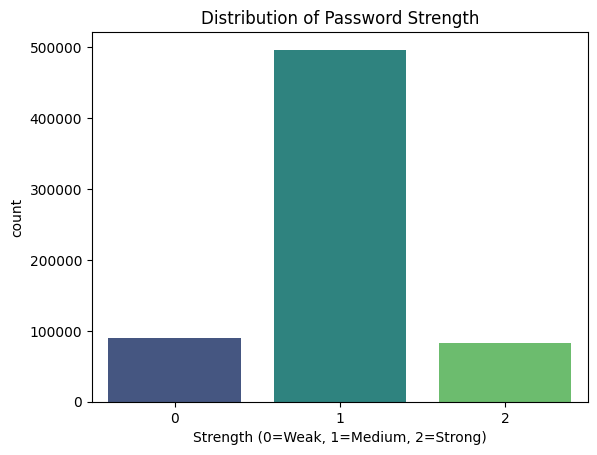

In [ ]:
sns.countplot(x='strength', data=df, palette="viridis")
plt.title("Distribution of Password Strength")
plt.xlabel("Strength (0=Weak, 1=Medium, 2=Strong)")
plt.show()

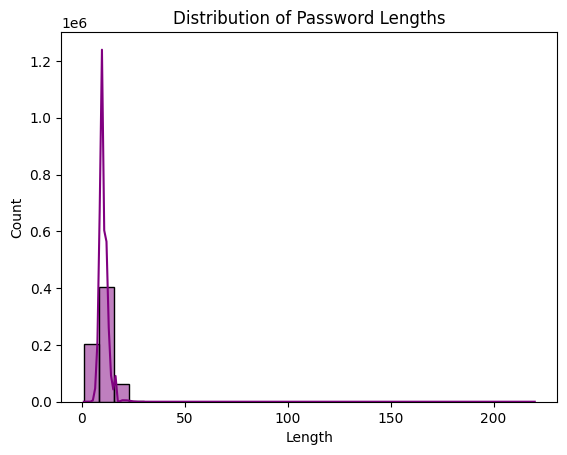

In [ ]:
df['password_length'] = df['password'].apply(len)

sns.histplot(df['password_length'], bins=30, kde=True, color='purple')
plt.title("Distribution of Password Lengths")
plt.xlabel("Length")
plt.show()

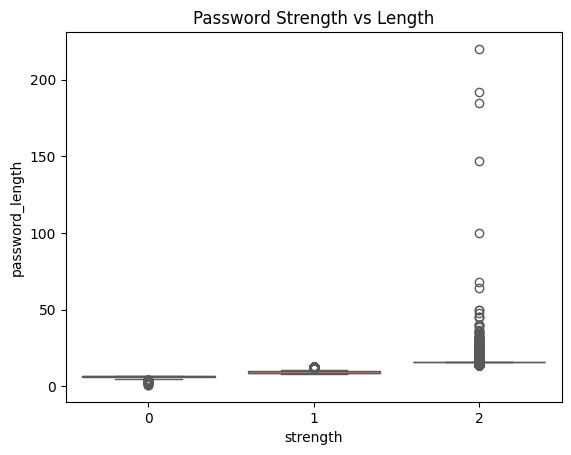

In [ ]:
sns.boxplot(x='strength', y='password_length', data=df, palette="Set2")
plt.title("Password Strength vs Length")
plt.show()

**Comparing Multiple Models**

Training Logistic Regression...
Logistic Regression Accuracy: 0.8272
Training Decision Tree...
Decision Tree Accuracy: 0.8498
Training Random Forest...
Random Forest Accuracy: 0.8811
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8347


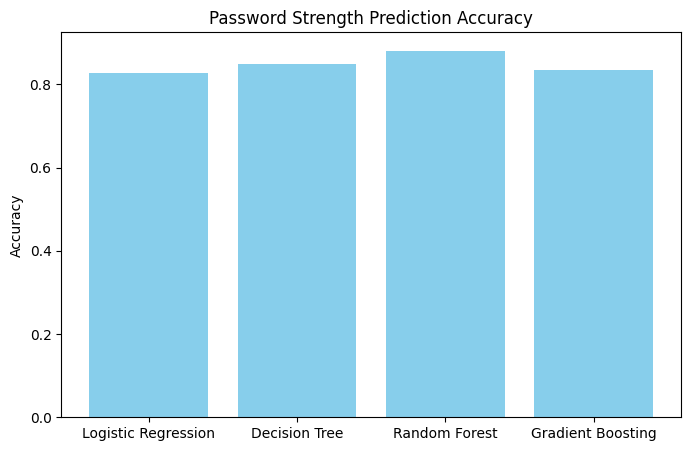

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset and clean
df = pd.read_csv("data.csv", on_bad_lines='skip').drop_duplicates(subset=['password']).dropna()

# Use a smaller subset for speed (optional)
df_small = df.sample(50000, random_state=42)  # 50k samples

# Features and target
X = df_small['password']
y = df_small['strength']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# TF-IDF vectorization (limited features for speed)
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2,3), max_features=10000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Define models (skip SVM for speed)
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Plot comparison
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Password Strength Prediction Accuracy")
plt.show()


**Save the best model (Random Forest)**

In [ ]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_vect, y_train)
joblib.dump((best_model, vectorizer), "password_strength_model.pkl")


['password_strength_model.pkl']

In [ ]:
model, vect = joblib.load("password_strength_model.pkl")
test_password = ["MyP@ssw0rd123"]
test_vect = vect.transform(test_password)
pred = model.predict(test_vect)
print("Predicted Strength:", pred[0])

Predicted Strength: 1
